## TODO: incluir medidas de demora de
- [] Entrega de paquetes
- [] cantidad de saltos utilizados por cada paquete
- [x] Utilización de los buffers de la red
- [] Utilización de los enlaces de la red
entre otros que el alumno crea conveniente.

In [19]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

# Archivos
dir = 'DATA/'
archivos = os.listdir(dir)

# Ordeno los archivos para que queden simpre en orden:
archivos.sort()

# Cargamos los datos de los archivos en el array `data`
# se mapea la info de cada caso n a la posicion n-1 en el array
data = []
for caso in range(len(archivos)):
    aux = pandas.read_csv(dir + archivos[caso])
    data.append(aux)

print("Archivos cargados: ",', '.join(archivos))

file_names = []
for archivo in archivos:
    nombre = archivo.replace('.csv', '').replace('-', ' ')
    file_names.append(nombre)

print("Nombres de archivos: ",', '.join(file_names))

Archivos cargados:  init.csv
Nombres de archivos:  init


## Ocupacion de buffers en el sistema

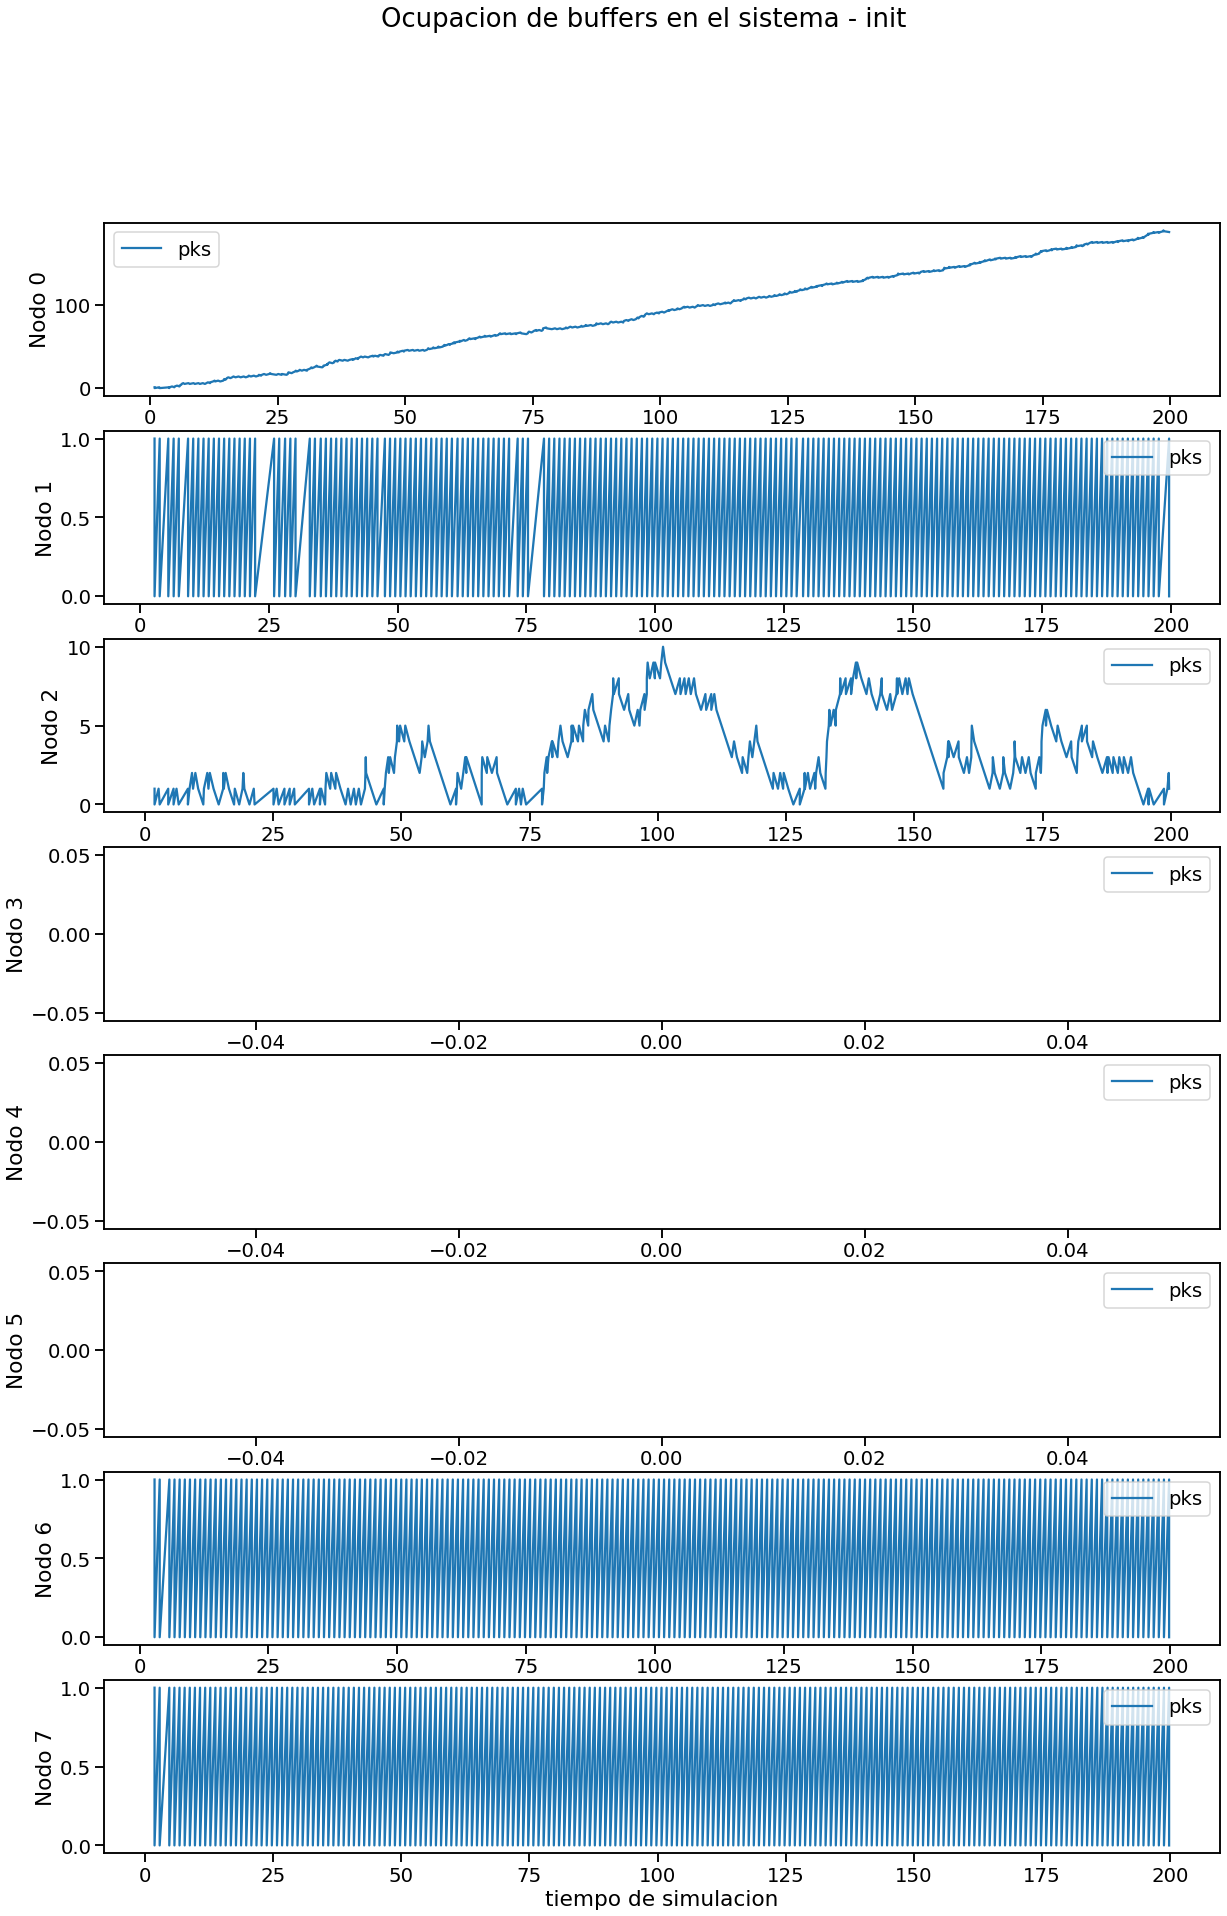

In [20]:
# nodes_number = data[0].loc[(data[0]['type'] == 'config') & (data[0]['attrname'] == 'Network.nodesNumber'), 'attrvalue'].tolist()
nodes_number = 8

for c in range(len(data)):
    caso = data[c]

    # Extraemos los valores del vector de cada nodo en un array y lo guardamos en un array
    time_node = [0] * nodes_number
    buffer_node = [0] * nodes_number
    for i in range(nodes_number):
        time_node[i] = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vectime'].tolist()
        buffer_node[i] = caso.loc[(caso['module'] == f'Network.node[{i}].lnk[0]') & (caso['name'] == 'Buffer Size'), 'vecvalue'].tolist()
        
        # convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
        time_node[i] = list(map(float,time_node[i][0].split())) if time_node[i] else [0]
        buffer_node[i] = list(map(float,buffer_node[i][0].split())) if buffer_node[i] else [0]

    # Graficamos
    fig, ax = plt.subplots(nodes_number,figsize=(20, 30))
    fig.suptitle(f'Ocupacion de buffers en el sistema - {file_names[c]}')
    plt.xlabel("tiempo de simulacion")
    #
    for i in range(nodes_number):
        ax[i].plot(time_node[i],buffer_node[i], label="pks")
        ax[i].set_ylabel(f"Nodo {i}")
        ax[i].legend()
    plt.show